In [2]:
from h36m_wobg_multiview import TrainSet
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [5]:
rt = np.eye(4)
rt[:3, 3] = [1,2,3]

In [6]:
ts = TrainSet("/local/omp/data/h36m/human_images/", 128)

In [10]:
np.array(ts.camera_parameters["extrinsics"][f"S{1}"]["54138969"]["t"]).flatten()

array([-346.0507814 ,  546.98077931, 5474.48108743])

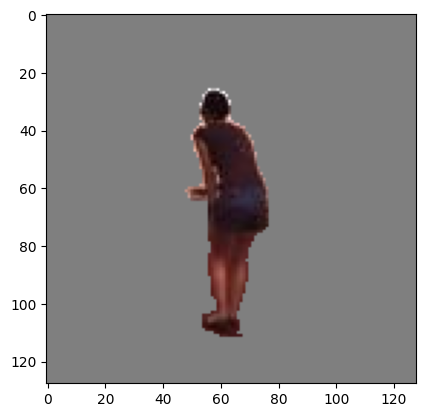

In [19]:
plt.imshow(ts[0]['img'].numpy().transpose(1,2,0) * 0.5 + 0.5)

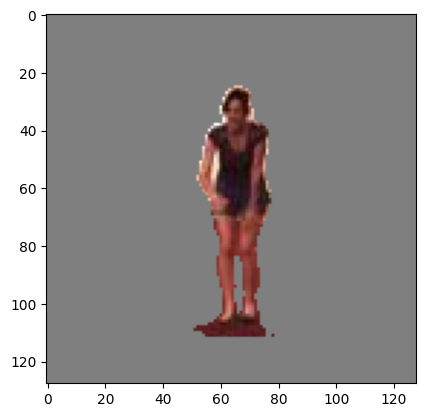

In [20]:
plt.imshow(ts[0]['img_rotated'].numpy().transpose(1,2,0) * 0.5 + 0.5)

In [24]:
ts[0]['rotation_matrix']

array([[-1.25280199e+03, -6.09325290e-02, -6.57580095e+01,
         2.40965353e+06],
       [-1.46869828e+02, -2.56456019e+02, -1.21925592e+03,
         3.44745569e+06],
       [-3.99319034e-01, -8.97783611e-01, -1.85819527e-01,
         5.47448109e+03]])

In [23]:
meta = pickle.load(open("/local/omp/data/h36m/human_data/Metadata/metadata.pkl", 'rb'))
meta

{'11+Posing.60457274': 1407,
 '4+Photo.58860488': 2598,
 '9+Sitting.60457274': 2962,
 '7+WalkDog.60457274': 2732,
 '11+Directions 1.58860488': 1552,
 '1+Eating.54138969': 2721,
 '8+SittingDown.54138969': 1501,
 '3+Purchases 1.55011271': 870,
 '8+Directions 1.58860488': 2011,
 '2+Smoking.58860488': 3423,
 '6+Discussion.54138969': 2415,
 '9+Sitting.54138969': 2962,
 '7+Greeting 1.54138969': 2215,
 '1+Eating 2.60457274': 2357,
 '6+Eating 1.60457274': 2010,
 '1+Walking 1.60457274': 3476,
 '2+Eating 2.55011271': 3598,
 '4+Waiting.55011271': 3816,
 '9+SittingDown.58860488': 2932,
 '2+SittingDown 3.58860488': 4091,
 '11+Posing.58860488': 1407,
 '6+Sitting 2.58860488': 1998,
 '3+Waiting 1.58860488': 2589,
 '8+WalkTogether 2.54138969': 2499,
 '8+Greeting.55011271': 1447,
 '6+WalkDog.60457274': 1594,
 '2+Directions 1.58860488': 3050,
 '2+Walking.54138969': 3660,
 '9+Directions.55011271': 2699,
 '11+Posing 1.60457274': 1481,
 '7+Waiting 1.55011271': 4201,
 '5+Phoning 1.55011271': 3277,
 '1+Walkin

In [26]:
import json
import numpy as np

In [19]:
camera_meta = json.load(open("/local/omp/human36m-camera-parameters/camera-parameters.json","r"))
camera_meta

{'intrinsics': {'54138969': {'calibration_matrix': [[1145.04940458804,
     0.0,
     512.541504956548],
    [0.0, 1143.78109572365, 515.4514869776],
    [0.0, 0.0, 1.0]],
   'distortion': [-0.207098910824901,
    0.247775183068982,
    -0.00142447157470321,
    -0.000975698859470499,
    -0.00307515035078854]},
  '55011271': {'calibration_matrix': [[1149.67569986785,
     0.0,
     508.848621645943],
    [0.0, 1147.59161666764, 508.064917088557],
    [0.0, 0.0, 1.0]],
   'distortion': [-0.194213629607385,
    0.240408539138292,
    -0.0027408943961907,
    -0.001619026613787,
    0.00681997559022603]},
  '58860488': {'calibration_matrix': [[1149.14071676148,
     0.0,
     519.815837182153],
    [0.0, 1148.7989685676, 501.402658888552],
    [0.0, 0.0, 1.0]],
   'distortion': [-0.208338188251856,
    0.255488007488945,
    -0.000759999321030303,
    0.00148438698385668,
    -0.00246049749891915]},
  '60457274': {'calibration_matrix': [[1145.51133842318,
     0.0,
     514.968197319863]

In [21]:
camera_meta["intrinsics"]['54138969']

{'calibration_matrix': [[1145.04940458804, 0.0, 512.541504956548],
  [0.0, 1143.78109572365, 515.4514869776],
  [0.0, 0.0, 1.0]],
 'distortion': [-0.207098910824901,
  0.247775183068982,
  -0.00142447157470321,
  -0.000975698859470499,
  -0.00307515035078854]}

In [25]:
camera_meta["extrinsics"]["S1"]["54138969"]


{'R': [[-0.9153617321513369, 0.40180836633680234, 0.02574754463350265],
  [0.051548117060134555, 0.1803735689384521, -0.9822464900705729],
  [-0.399319034032262, -0.8977836111057917, -0.185819527201491]],
 't': [[-346.05078140028075], [546.9807793144001], [5474.481087434061]]}

In [28]:
# To build projection matrix P just multiply calibration and extrinsics matricies:

calibration_matrix = camera_meta["intrinsics"]['54138969']["calibration_matrix"]
R = camera_meta["extrinsics"]["S1"]["54138969"]["R"]
t = camera_meta["extrinsics"]["S1"]["54138969"]["t"]

P = calibration_matrix @ np.hstack([R, t])
P.shape

(3, 4)

In [62]:
import os
from collections import defaultdict


In [33]:
data_root = "/local/omp/data/h36m/human_images/"

In [46]:
folder_names = os.listdir(os.path.join(data_root, 'S{}'.format(1), 'WithBackground'))

In [123]:
samples = []

actions = ['Directions', 'Discussion', 'Posing', 'Waiting', 'Greeting', 'Walking']
grouped_actions = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for subject_index in [1, 5, 6, 7, 8, 9]:
    for folder_name in os.listdir(os.path.join(data_root, 'S{}'.format(subject_index), 'WithBackground')):
        if folder_name.startswith(tuple(actions)):
            action_name, camera_name = folder_name.split('.')
            for frame_index in os.listdir(os.path.join(data_root, 'S{}'.format(subject_index),
                                                        'WithBackground', folder_names)):
                grouped_actions[subject_index][action_name][frame_index.split('.')[0]].append((subject_index, folder_name, frame_index.split('.')[0], action_name, camera_name))
                # samples.append((subject_index, folder_name, frame_index.split('.')[0], action_name, camera_name))
                    

In [127]:
for s in grouped_actions.keys():
    for a in grouped_actions[s].keys():
        for f in grouped_actions[s][a].keys():
            samples.append(grouped_actions[s][a][f])

In [126]:
grouped_actions[1]["Directions 1"]["2492"]

[(1, 'Directions 1.60457274', '2492', 'Directions 1', '60457274'),
 (1, 'Directions 1.54138969', '2492', 'Directions 1', '54138969'),
 (1, 'Directions 1.58860488', '2492', 'Directions 1', '58860488'),
 (1, 'Directions 1.55011271', '2492', 'Directions 1', '55011271')]